# Projet Python 2019

## Machine Learning for first order theorem proving

### Installation

Dans un premier temps, il faudra importer tous les packages qui seront nécessaire pour le projet. Dans le cadre de ce projet nous allons dans un premier temps faire de la data visualisation et data préparatvec panda, matplotlib (en particulier pyplot) et seaborn.

In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import grid_search
import matplotlib.pyplot as plt
%matplotlib inline

Dans un deuxième temps, nous allons nous pencher sur la modélisation et les hyperparamètres avec scikit et grid search.

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm

### DataFrame

Nous allons dans un premier temps récupérer les fichiers CSV qui nous intéressent tout en renomant les les colonnes. La base de donnée mise à disposition est déjà séparée avec un training set et un testing set. Nous allons donc créer deux dataFrames: dt (le training) et dv ( le test). Nous renommons les 14 premières colonnes sachant qu'elles représentent les static features et les 37 suivantes sachant que ceux sont les dynamic features. Enfin les 6 dernières colonnes représentent les fonctions heuristiques que nous cherchons à tester.

In [6]:
dt = pd.read_table("train.csv",encoding = "latin1", sep = ',', names= 
                   ["static1",
        "static2",
        "static3",
        "static4",
        "static5",
        "static6",
        "static7",
        "static8",
        "static9",
        "static10",
        "static11",
        "static12",
        "static13",
        "static14",
        "dynamic1",
        "dynamic2",
        "dynamic3",
        "dynamic4",
        "dynamic5",
        "dynamic6",
        "dynamic7",
        "dynamic8",
        "dynamic9",
        "dynamic10",
        "dynamic11",
        "dynamic12",
        "dynamic13",
        "dynamic14",
        "dynamic15",
        "dynamic16",
        "dynamic17",
        "dynamic18",
        "dynamic19",
        "dynamic20",
        "dynamic21",
        "dynamic22",
        "dynamic23",
        "dynamic24",
        "dynamic25",
        "dynamic26",
        "dynamic27",
        "dynamic28",
        "dynamic29",
        "dynamic30",
        "dynamic31",
        "dynamic32",
        "dynamic33",
        "dynamic34",
        "dynamic35",
        "dynamic36",
        "dynamic37",
        "H1",
        "H2",
        "H3",
        "H4",
        "H5",
        "H0"]
                  
                  )

In [7]:
dv = pd.read_table("test.csv",encoding = "latin1", sep = ',', names= 
                   ["static1",
        "static2",
        "static3",
        "static4",
        "static5",
        "static6",
        "static7",
        "static8",
        "static9",
        "static10",
        "static11",
        "static12",
        "static13",
        "static14",
        "dynamic1",
        "dynamic2",
        "dynamic3",
        "dynamic4",
        "dynamic5",
        "dynamic6",
        "dynamic7",
        "dynamic8",
        "dynamic9",
        "dynamic10",
        "dynamic11",
        "dynamic12",
        "dynamic13",
        "dynamic14",
        "dynamic15",
        "dynamic16",
        "dynamic17",
        "dynamic18",
        "dynamic19",
        "dynamic20",
        "dynamic21",
        "dynamic22",
        "dynamic23",
        "dynamic24",
        "dynamic25",
        "dynamic26",
        "dynamic27",
        "dynamic28",
        "dynamic29",
        "dynamic30",
        "dynamic31",
        "dynamic32",
        "dynamic33",
        "dynamic34",
        "dynamic35",
        "dynamic36",
        "dynamic37",
        "H1",
        "H2",
        "H3",
        "H4",
        "H5",
        "H0"]
                  
                  )

In [8]:
dt.head()

,static1,static2,static3,static4,static5,static6,static7,static8,static9,static10,...,dynamic34,dynamic35,dynamic36,dynamic37,H1,H2,H3,H4,H5,H0
0,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,-0.48278,1.4630,0.27015,-1.5559,-1,-1,-1,-1,-1,1
1,1.4895,0.81688,2.1168,1.7895,1.5403,-0.31850,-1.2477,-0.14537,-0.59356,-0.23316,...,-0.48278,1.4801,0.21361,-1.5559,1,-1,-1,-1,-1,-1
2,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,-0.48278,1.4744,0.23245,-1.5559,-1,-1,-1,-1,-1,1
3,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,-0.48278,1.4401,0.34553,-1.5559,-1,-1,-1,-1,-1,1
4,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,-0.48278,1.4458,0.32669,-1.5559,-1,-1,-1,-1,-1,1


In [9]:
dv.head()

,static1,static2,static3,static4,static5,static6,static7,static8,static9,static10,...,dynamic34,dynamic35,dynamic36,dynamic37,H1,H2,H3,H4,H5,H0
0,-0.715880,-3.00440,2.117800,-0.601430,2.215900,-0.537990,-1.763800,0.263230,-0.213340,-0.64141,...,-0.43436,1.008800,-0.46486,-0.873860,-1,-1,1,-1,-1,-1
1,-0.397340,-0.21463,-0.476530,-0.559270,0.070425,0.614320,-0.302890,-0.417770,-0.071453,-0.64141,...,-0.48990,0.052101,0.28711,-0.140210,1,-1,-1,-1,-1,-1
2,2.009400,0.83152,-0.570520,2.232600,1.965400,0.032973,-1.763800,-0.826370,-0.709950,-0.64141,...,3.07240,2.257900,-0.46486,-2.131800,1,-1,-1,-1,-1,-1
3,-0.689930,-0.29367,-0.570520,-0.652960,-0.840610,-0.332450,0.878850,0.263230,0.425160,-0.50533,...,-0.48990,0.229580,0.70488,-0.446610,-1,-1,-1,1,-1,-1
4,0.079707,0.28115,0.067832,0.063937,-0.065041,0.013117,0.052817,-0.009172,-0.029810,-0.36924,...,-0.36529,-0.304190,0.98631,0.004927,-1,-1,-1,-1,-1,1


Ce que nous allons chercher à faire avec ce jeu de données et de réussir à déterminer quelle méthode heuristique est la plus efficace selon un jeu de 51 données (dynamique et statique) provenant de problème inscrit dans la logique de premier ordre.

On se rend donc compte que nous avons en quelque sorte 6 colonnes target cr nous voulons prédire si oui ou non une de c'est colonne est la meilleure solution. Ici, les colonnes H prenent l valeur 1 ou -1. Seule une colonne par ligne prend la valeure 1 et elle est considérée comme la méthode à choisir par rapport au problème. On va donc se faciliter la tache et créer une dernière "results" colonne fusionnant les 6 dernières. Les valeurs de cette colonne représentera par ligne, l'heuristique à prendre:
- si H1 prend la valeur 1 dans la première ligne, la colonne résults prendre la valeur 1
- si H2 prend la valeur 1 dans la première ligne, la colonne résults prendre la valeur 2
- ainsi de suite...

In [10]:
dt_new = dt
dv_new = dv
def addResult(dt):
    if dt['H1'] == 1:
        return 1
    elif dt['H2'] == 1:
        return 2
    elif dt['H3'] == 1:
        return 3
    elif dt['H4'] == 1:
        return 4
    elif dt['H5'] == 1:
        return 5
    elif dt['H0'] == 1:
        return 0
dt['results']=dt.apply(addResult,axis=1)
dv['results']=dv.apply(addResult,axis=1)
dt.head()

,static1,static2,static3,static4,static5,static6,static7,static8,static9,static10,...,dynamic35,dynamic36,dynamic37,H1,H2,H3,H4,H5,H0,results
0,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,1.4630,0.27015,-1.5559,-1,-1,-1,-1,-1,1,0
1,1.4895,0.81688,2.1168,1.7895,1.5403,-0.31850,-1.2477,-0.14537,-0.59356,-0.23316,...,1.4801,0.21361,-1.5559,1,-1,-1,-1,-1,-1,1
2,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,1.4744,0.23245,-1.5559,-1,-1,-1,-1,-1,1,0
3,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,1.4401,0.34553,-1.5559,-1,-1,-1,-1,-1,1,0
4,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,1.4458,0.32669,-1.5559,-1,-1,-1,-1,-1,1,0


In [13]:
dv.head()

,static1,static2,static3,static4,static5,static6,static7,static8,static9,static10,...,dynamic35,dynamic36,dynamic37,H1,H2,H3,H4,H5,H0,results
0,-0.715880,-3.00440,2.117800,-0.601430,2.215900,-0.537990,-1.763800,0.263230,-0.213340,-0.64141,...,1.008800,-0.46486,-0.873860,-1,-1,1,-1,-1,-1,3
1,-0.397340,-0.21463,-0.476530,-0.559270,0.070425,0.614320,-0.302890,-0.417770,-0.071453,-0.64141,...,0.052101,0.28711,-0.140210,1,-1,-1,-1,-1,-1,1
2,2.009400,0.83152,-0.570520,2.232600,1.965400,0.032973,-1.763800,-0.826370,-0.709950,-0.64141,...,2.257900,-0.46486,-2.131800,1,-1,-1,-1,-1,-1,1
3,-0.689930,-0.29367,-0.570520,-0.652960,-0.840610,-0.332450,0.878850,0.263230,0.425160,-0.50533,...,0.229580,0.70488,-0.446610,-1,-1,-1,1,-1,-1,4
4,0.079707,0.28115,0.067832,0.063937,-0.065041,0.013117,0.052817,-0.009172,-0.029810,-0.36924,...,-0.304190,0.98631,0.004927,-1,-1,-1,-1,-1,1,0


### Visualisation de data

Cherchons dans un premier temps à visualiser notre jeu de données afin de mieux comprendre le sujet.

Nous allons tout d'abord regarder les valeurs que prennent les heuristiques dans le training set et le testing set pour vérifier dans un premier temps s'il y a bien une cohérence, c'est-à-dire des résultas qui se ressemble.

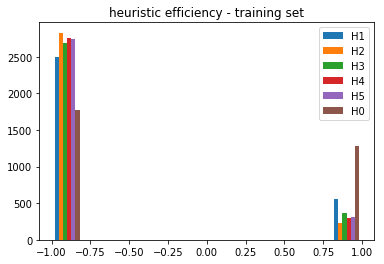

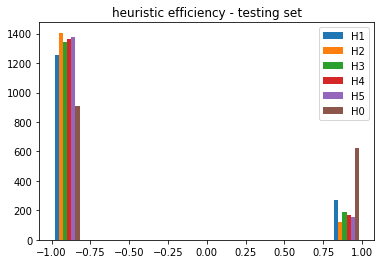

In [14]:
plt.hist([dt.H1, dt.H2, dt.H3, dt.H4,dt.H5, dt.H0], label=['H1', 'H2', 'H3', 'H4', 'H5', 'H0'])
plt.legend(loc='upper right')
plt.title('heuristic efficiency - training set')
plt.show()

plt.hist([dv.H1, dv.H2, dv.H3, dv.H4,dv.H5, dv.H0], label=['H1', 'H2', 'H3', 'H4', 'H5', 'H0'])
plt.legend(loc='upper right')
plt.title('heuristic efficiency - testing set')
plt.show()

Pour le reste de la visualisation, on peut d'ors et déjà se douter, d'après les informations que l'on a, qu'il sera dure de montrer une vrai corrélation entre les données que l'on a et les heuristiques. En effet, nous avons 51 colonnes dont nous ne connaissons pas réellement la définition au-delà qu'elles soient dynamique ou statique. nous allons donc principalement faire des comparaison entre le training set et le test set.

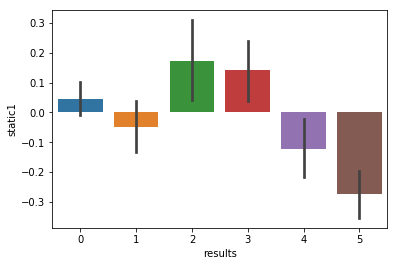

In [15]:
ax = sns.barplot(x="results", y="static1",data=dt)

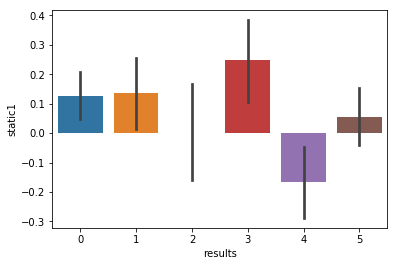

In [16]:
ax = sns.barplot(x="results", y="static1",data=dv)

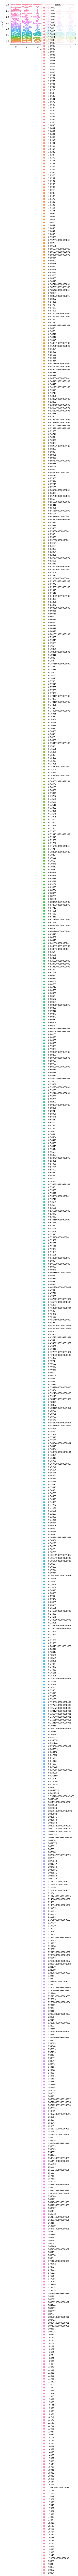

In [17]:
ax = sns.swarmplot(x="results", y="static1",hue="static1",data=dt)

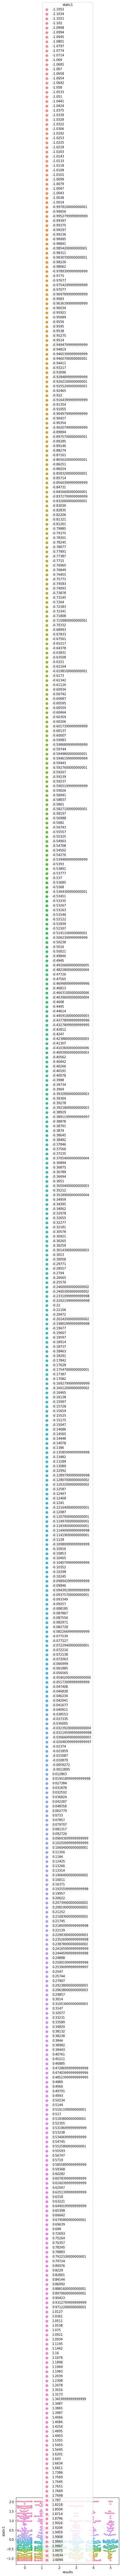

In [20]:
ax = sns.swarmplot(x="results", y="static1",hue="static1",data=dv)

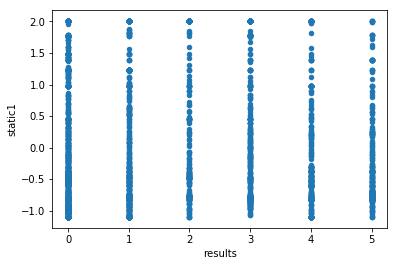

In [21]:
gp_count = dt.groupby(["results"])["static1"].count()
somme = gp_count.values.sum()
dt.plot.scatter("results", "static1")

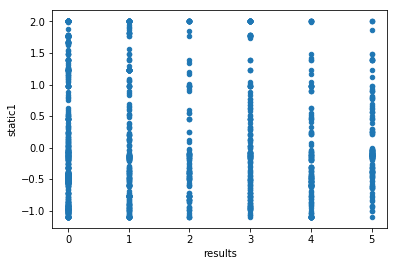

In [22]:
gp_count = dv.groupby(["results"])["static1"].count()
somme = gp_count.values.sum()
dv.plot.scatter("results", "static1")

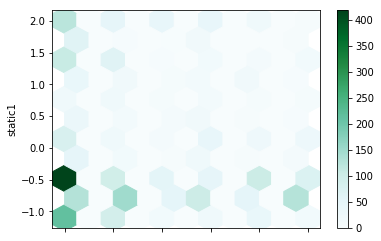

In [23]:
dt.plot.hexbin(x="results", y="static1", gridsize=10)

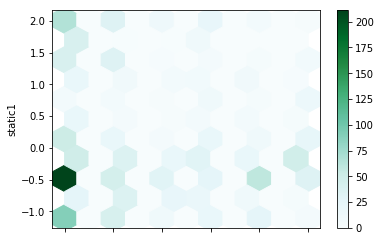

In [24]:
dv.plot.hexbin(x="results", y="static1", gridsize=10)

### Modélisation et optimisation des hyperparamètres

Sachant que notre base de données nous donne déjà un set de training et un set de test, nous n'avons pas besoin de trin_test_split et pouvons directement associer les valeurs à entraînée et à tester à nos data et target.

In [25]:
"""

Nous allons donc garder dans X_ toutes nos colonnes à part les heuristiques et la colonne que nous avons crée d'où le drop.
Pour notre target Y_ nous allons nous concentrer sur la colonne result car il était compliqué de travailler sur 6 colonnes.

"""

X_train = dv.drop(['H1','H2','H3','H4','H5','H0','results'], axis = 1)
Y_train = dv.results

X_test=dt.drop(['H1','H2','H3','H4','H5','H0','results'], axis = 1)
Y_test = dt.results

Une fois nos jeux mis en place, il nous faut standrdiser nos valeurs en fitant sur le data de training.

In [26]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)
svr = svm.SVR(kernel = 'linear')

Nous allons à présent nous intéresser au grid search. Grid search nous permet de faire une optimisation des paramètres. Pour cela nous allons utiliser SVR ainsi que SVC pour tester voir ce qui marche le mieux. Nous allons également manipuler les hyperparamètres afin d'avoir un résultat satisfaisant.

In [29]:
from sklearn import grid_search

parameters = {'C' : [100,105,110,115,120],
              'gamma' : [1,0.016,0.015,0.14,0.1,0.01],
               'kernel':['rbf','sigmoid']}

grid = grid_search.GridSearchCV(svm.SVR(),parameters,n_jobs = -1)
grid.fit(X_train,Y_train)
print (grid.best_score_,grid.best_estimator_)

0.07830439369119808 SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [132]:
from sklearn import grid_search

parameters = {'C' : [100,105,110,115,120],
              'gamma' : [1,0.016,0.015,0.14,0.1,0.01],
               'kernel':['rbf','sigmoid']}

grid = grid_search.GridSearchCV(svm.SVC(),parameters,n_jobs = -1)
grid.fit(X_train,Y_train)
print (grid.best_score_,grid.best_estimator_)

0.5111111111111111 SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


Au premier résulat on remarque que SVC est bien plus efficace dans notre contexte. En effet on psse de 7% de réussite à 51%. C'est pour cette raison que pour la suite, lors de la manipulation des hypermaramètres, nous allons nous concentrer sur le SVC:

In [133]:
parameters = {  'gamma' : [0.01, 0.1, 0.5]       }
grid = grid_search.GridSearchCV(svm.SVC(), parameters, n_jobs=-1)
grid.fit(X_train, Y_train)
print (grid.best_score_, grid.best_estimator_)

0.5006535947712418 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [135]:
parameters = {  'C'      : [0.5, 1, 1.5]             ,
                'gamma'  : [0.5, 0.1, 0.15]      }
grid = grid_search.GridSearchCV(svm.SVC(), parameters, n_jobs=-1)
grid.fit(X_train, Y_train)
print (grid.best_score_, grid.best_estimator_)

0.5104575163398692 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.15, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


Il semble que nous n'arrivions pas à dépasser les 51% de réussite. Bien que cela semble bien maigre, considérant notre sujet, le résultat n'est pas particulièrement aberrant. En effet la prédiction que nous cherchions à faire n'était pas du tout évidente. En effet nous cherchons à savoir, à l'avance, avec un jeu de donnée aléatoire quelle méthode heuristique utilisée parmis 5 (plus une témoin). Il semble dure aux premiers abord de voir un lien automatique sans faire des essaies avant. Gardant ça en mémoire, il sembre finalement que 51% reste un nombre tout à fait honnête.